In [1]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df=pd.read_excel('alldata.xlsx',sheet_name='month')
df.head()

,Month,NEVSales,Sales(kilo),AllSales,Ratio,ChargingPost,ChargingPost(kilo),research input,input(billion)
0,2016-01-01,2.2,22.0,222.87,0.987123,3.7975,37.975,7.528559,0.075081
1,2016-02-01,1.4,14.0,137.57,1.017664,4.9000,49.000,7.396459,0.081456
2,2016-03-01,2.3,23.0,205.57,1.118840,6.0023,60.023,7.264359,0.087832
3,2016-04-01,3.2,32.0,177.91,1.798662,6.5109,65.109,7.132258,0.094208
4,2016-05-01,3.5,35.0,178.30,1.962984,7.2296,72.296,7.000158,0.100584


In [2]:
df.columns=["Month","NEVSales","NEVSales(kilounits)","all","Ratio","Charging","Charging(k)","research input","input(billion)"]
df.head()

,Month,NEVSales,NEVSales(kilounits),all,Ratio,Charging,Charging(k),research input,input(billion)
0,2016-01-01,2.2,22.0,222.87,0.987123,3.7975,37.975,7.528559,0.075081
1,2016-02-01,1.4,14.0,137.57,1.017664,4.9000,49.000,7.396459,0.081456
2,2016-03-01,2.3,23.0,205.57,1.118840,6.0023,60.023,7.264359,0.087832
3,2016-04-01,3.2,32.0,177.91,1.798662,6.5109,65.109,7.132258,0.094208
4,2016-05-01,3.5,35.0,178.30,1.962984,7.2296,72.296,7.000158,0.100584


In [3]:
df=df.drop("NEVSales", axis=1)
df=df.drop("all", axis=1)
df=df.drop("Charging", axis=1)
df=df.drop("NEVSales(kilounits)", axis=1)
df=df.drop("research input",axis=1)
df=df.drop("Month",axis=1)
df.head()

,Ratio,Charging(k),input(billion)
0,0.987123,37.975,0.075081
1,1.017664,49.000,0.081456
2,1.118840,60.023,0.087832
3,1.798662,65.109,0.094208
4,1.962984,72.296,0.100584


In [4]:
#数据描述
df.describe()

,Ratio,Charging(k),input(billion)
count,93.000000,93.000000,93.000000
mean,10.641912,718.120763,0.368369
std,10.792028,644.458953,0.175364
min,0.270514,37.975000,0.075081
25%,2.843123,204.729000,0.221725
50%,4.835972,495.502000,0.366359
75%,17.471676,1062.337000,0.463214
max,35.514967,2461.556000,0.752856


In [5]:
#缺失值检验
df[df.isnull()==True].count()

Ratio             0
Charging(k)       0
input(billion)    0
dtype: int64

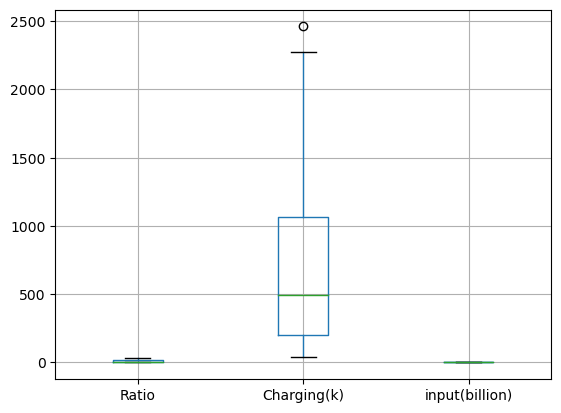

In [6]:
df.boxplot()
plt.show()

In [7]:
##相关系数矩阵 r(相关系数) = x和y的协方差/(x的标准差*y的标准差) == cov（x,y）/σx*σy
#相关系数0~0.3弱相关0.3~0.6中等程度相关0.6~1强相关
df.corr()

,Ratio,Charging(k),input(billion)
Ratio,1.000000,0.959482,0.892676
Charging(k),0.959482,1.000000,0.958261
input(billion),0.892676,0.958261,1.000000


E:\entertainment\Anaconda\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


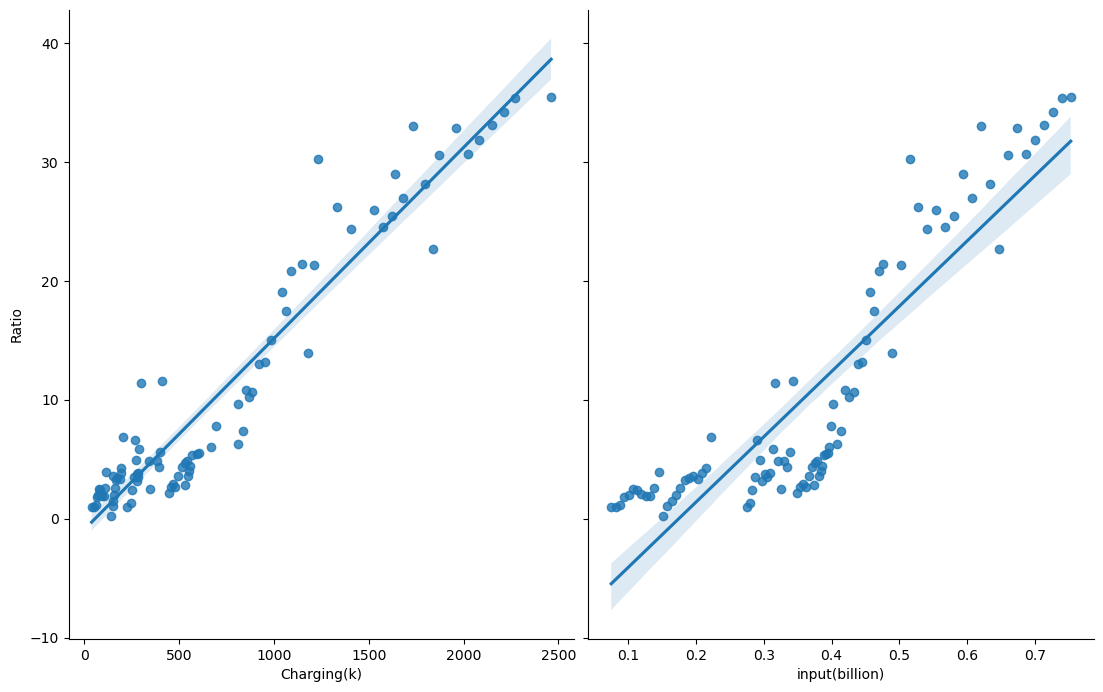

In [9]:
import seaborn as sns
# 通过加入一个参数kind='reg'，seaborn可以添加一条最佳拟合直线和95%的置信带。
sns.pairplot(df, x_vars=['Charging(k)','input(billion)'], y_vars='Ratio', size=7, aspect=0.8,kind = 'reg')
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [12]:
X_train,X_test,Y_train,Y_test = train_test_split(df.iloc[:,-2:],df["Ratio"],train_size = 0.8,test_size = 0.2)
 
print("原始数据特征:",df.iloc[:,-2:].shape,",训练数据特征:",X_train.shape,",测试数据特征:",X_test.shape)
print("原始数据标签:",df["Ratio"].shape,",训练数据标签:",Y_train.shape,",测试数据标签:",Y_test.shape)

原始数据特征: (93, 2) ,训练数据特征: (74, 2) ,测试数据特征: (19, 2)
原始数据标签: (93,) ,训练数据标签: (74,) ,测试数据标签: (19,)


In [13]:
model = LinearRegression()
model.fit(X_train,Y_train)

a  = model.intercept_ #截距 
b = model.coef_ #回归系数
print("最佳拟合线:截距",a,",回归系数：",b)

最佳拟合线:截距 2.6566932462337967 ,回归系数： [  0.02117981 -18.94855461]


即所得的多元线性回归模型的函数为 ：
y = 2.656 + 0.021 * ChargingPost - 18.948 * reserch input

In [14]:
#评估一下
score = model.score(X_test,Y_test) 
print(score)

0.9263456971890608


In [15]:
#看看预测效果
#对线性回归进行预测
Y_pred = model.predict(X_test)
print(Y_pred)

[ 2.77600404 29.73796463  7.77330169 13.19046779 29.33307833  2.24123202
  5.515706   12.54138234  5.92676944  2.79286843  6.78398599 31.36676884
  6.566573    2.72994999  2.26367363  2.77605914  2.79145297  2.28198808
 32.52576242]


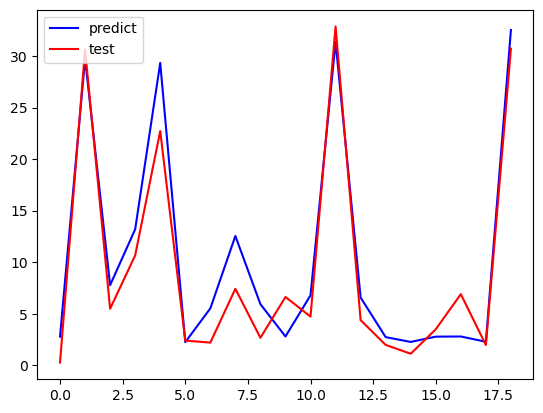

In [16]:
plt.plot(range(len(Y_pred)),Y_pred,'b',label="predict")
plt.plot(range(len(Y_test)),Y_test,'r',label="test")
#显示图像
#添加图标标签
plt.legend(loc=2)
plt.show()

就还行吧。。